## Instalación en Linux

Desde la terminal:

<code>cd al directorio common</code>

<code>bash -i setup_linux.sh</code>

## Instalación en Mac

## Instalación en Windows

Desde Anaconda Prompt:

<code>cd al directorio common</code>

<code>setup_win.sh</code>

## Testing

In [1]:
import os, sys, subprocess
from ipywidgets import Layout, Box, Image, HTML

def popen(cmd):
    try:
        print(f"Running command `{cmd}`... ", end="")
        proc = subprocess.run(
            cmd,
            shell=True,
            check=True,
            universal_newlines=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE
        )
        print("ok")
        return proc.stdout
    except subprocess.CalledProcessError as err:
        print("error\n   ", err.stderr)
        raise

def list_required_packages(requirements_file_path):
    with open(requirements_file_path) as file:
        return file.readlines()
        
        
def list_conda_installed_packages():
    output_lines = popen('conda list').split("\n")

    names = []

    for line in output_lines:
        line_clean = " ".join(line.split())
        line_clean_parts = line_clean.split(' ')
        if len(line_clean_parts) > 1:
            package_version = line_clean_parts[0] + '=' + line_clean_parts[1]
            names.append(package_version)
    
    return(names)


def test_installed_packages(requirements_file_path):

    installed = list_conda_installed_packages()    
    required_packages = list_required_packages(requirements_file_path)
    for p in required_packages:
        package_name = p.strip()
        if package_name not in installed:            
            print(package_name  + ' not installed')
        else:
            print(package_name + ' already installed' )



In [2]:
requirements_file_path = 'requirements.txt'
test_installed_packages(requirements_file_path)

Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5.0 not installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


**El resultado de la celda de arriba debería ser "already installed" en todas las lineas**

In [3]:
requirements_file_path = 'requirements_conda-forge.txt'
test_installed_packages(requirements_file_path)

Running command `conda list`... ok
nodejs=15.3.0 already installed
lightgbm=3.1.1 already installed
catboost=0.24.3 already installed
scikit-plot=0.3.7 already installed
lime=0.2.0.1 already installed
python-graphviz=0.15 already installed
imbalanced-learn=0.7.0 already installed
google-cloud-bigquery=2.2.0 already installed


**El resultado de la celda de arriba debería ser "already installed" en todas las lineas**

In [4]:
requirements_file_path = 'requirements_plotly.txt'
test_installed_packages(requirements_file_path)

Running command `conda list`... ok
plotly=4.14.1 already installed
chart-studio=1.1.0 already installed
plotly-orca=1.3.1 already installed


**El resultado de la celda de arriba debería ser "already installed" en todas las lineas**

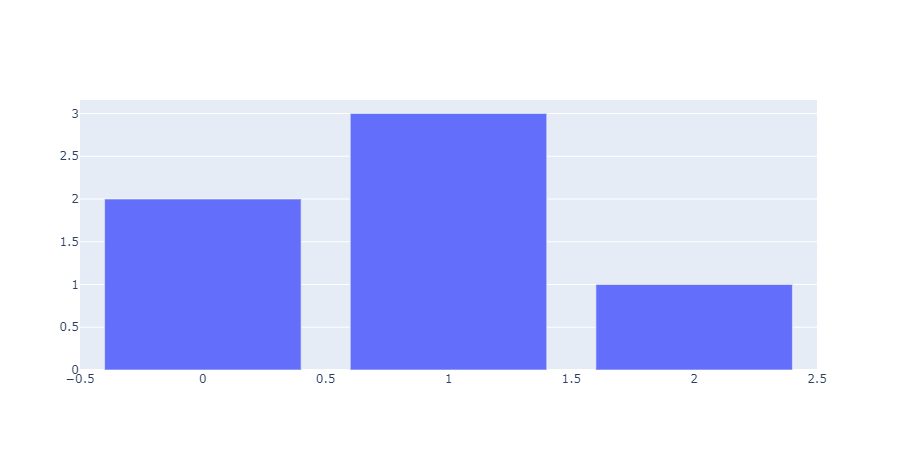

In [5]:
# test plotly

import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

**Como resultado de la ejecución de la celda de arriba deberíamos ver un gráfico de barras**